In [1]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

data_path = '/proj/NIRAL/users/siyangj/NeonateMRISeg/TrainigData/'
normal_path = '/proj/NIRAL/users/siyangj/myData/normal'

ImportError: No module named 'niftynet'

(124, 177, 200)
0
426783
58438644


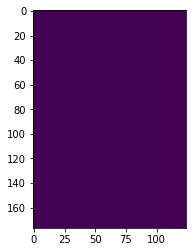

In [69]:
i=8
im1_dir = data_path+str(i)+'/'+str(i)+'-T1-stripped.nrrd'
im1 = sitk.ReadImage(im1_dir)
im1_arr = sitk.GetArrayFromImage(im1)
plt.imshow(im1_arr[60,:,:],interpolation='none')

print(im1.GetSize())
print((im1_arr<0).sum())
print(np.count_nonzero(im1_arr))
print(im1_arr.sum())

In [66]:
print(im1.GetSpacing())
print(im1_arr.shape)
print((min(np.where(im1_arr>0)[0]),max(np.where(im1_arr>0)[0])))
print((min(np.where(im1_arr>0)[1]),max(np.where(im1_arr>0)[1])))
print((min(np.where(im1_arr>0)[2]),max(np.where(im1_arr>0)[2])))

(1.000001072883606, 0.9999996423721313, 0.9999995231628418)
(180, 177, 124)
(77, 168)
(36, 147)
(16, 108)


In [31]:
print(im1.GetSize())
help(sitk.Crop)

(124, 140, 190)
Help on function Crop in module SimpleITK.SimpleITK:

Crop(*args, **kwargs)
    Crop(Image image1, VectorUInt32 lowerBoundaryCropSize, VectorUInt32 upperBoundaryCropSize) -> Image
    
    
    
    Decrease the image size by cropping the image by an itk::Size at both the upper and lower bounds of the largest possible region.
    
    
    This function directly calls the execute method of CropImageFilter in order to support a procedural API
    
    
    See:
     itk::simple::CropImageFilter for the object oriented interface



In [32]:
im1_n = sitk.ConstantPad(im1,[0,2,0],[0,2,0],constant=0)

In [33]:
im1_n = sitk.Crop(im1_n,[2,0,54],[2,0,0])

In [56]:
im1_n.GetSize()

(120, 144, 136)

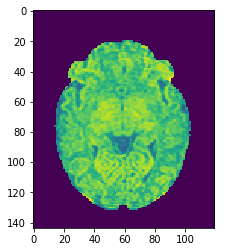

In [35]:
im1_n_arr = sitk.GetArrayFromImage(im1_n)
plt.imshow(im1_n_arr[60,:,:],interpolation='none')

In [29]:
np.where(im1_arr<0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

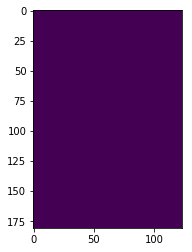

In [90]:
im2 = sitk.ReadImage('/nas/longleaf/home/siyangj/myNIRAL/myData/clean/T1/8.nrrd')
im2_arr = sitk.GetArrayFromImage(im2)
plt.imshow(im2_arr[53,:,:])

(120, 144, 136)


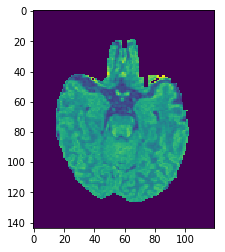

In [84]:
im1c = sitk.ReadImage('/nas/longleaf/home/siyangj/myNIRAL/myData/clean/T1T2/2.nrrd')
print(im1c.GetSize())
im1c_arr = sitk.GetArrayFromImage(im1c)
plt.imshow(im1c_arr[53,:,:,0])